## Image Classification

Model that Classifies an ID and a Passport given an image of either

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

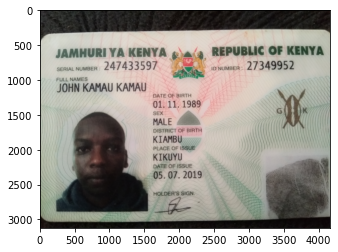

In [42]:
img = image.load_img('C:/Users/lggat/ML - ID & Pass/Gathoni_Assignment_OpenCv_Images/training/id/1.jpg')
plt.imshow(img)

In [43]:
cv2.imread('C:/Users/lggat/ML - ID & Pass/Gathoni_Assignment_OpenCv_Images/training/id/1.jpg')

array([[[23, 18, 27],
        [26, 21, 30],
        [32, 27, 36],
        ...,
        [12, 16, 21],
        [12, 17, 20],
        [12, 17, 20]],

       [[44, 39, 48],
        [42, 37, 46],
        [41, 36, 45],
        ...,
        [13, 17, 22],
        [13, 18, 21],
        [12, 17, 20]],

       [[51, 46, 55],
        [48, 43, 52],
        [46, 41, 50],
        ...,
        [13, 17, 22],
        [12, 16, 21],
        [12, 16, 21]],

       ...,

       [[13, 14, 18],
        [12, 13, 17],
        [11, 12, 16],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [18, 18, 18]],

       [[13, 14, 18],
        [12, 13, 17],
        [12, 13, 17],
        ...,
        [25, 25, 25],
        [21, 21, 21],
        [18, 18, 18]],

       [[13, 14, 18],
        [12, 13, 17],
        [11, 12, 16],
        ...,
        [26, 26, 26],
        [20, 20, 20],
        [17, 17, 17]]], dtype=uint8)

In [44]:
# rescale images
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [45]:
train_dataset = train.flow_from_directory('C:/Users/lggat/ML - ID & Pass/Gathoni_Assignment_OpenCv_Images/training/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('C:/Users/lggat/ML - ID & Pass/Gathoni_Assignment_OpenCv_Images/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 51 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [46]:
print(train_dataset.class_indices)
print(train_dataset.classes)

{'id': 0, 'passport': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [47]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])

In [48]:
# compile model
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [49]:
# fit the model
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 12,
                     validation_data = validation_dataset)

Epoch 1/12
5/5 [==============================] - 7s 1s/step - loss: 11.4588 - acc: 0.6000 - val_loss: 1.0483 - val_acc: 0.5333
Epoch 2/12
5/5 [==============================] - 3s 593ms/step - loss: 1.0025 - acc: 0.6000 - val_loss: 0.7449 - val_acc: 0.4667
Epoch 3/12
5/5 [==============================] - 3s 627ms/step - loss: 0.6686 - acc: 0.5333 - val_loss: 0.5451 - val_acc: 0.8000
Epoch 4/12
5/5 [==============================] - 3s 632ms/step - loss: 0.7090 - acc: 0.6000 - val_loss: 0.4613 - val_acc: 0.9333
Epoch 5/12
5/5 [==============================] - 3s 667ms/step - loss: 0.6959 - acc: 0.6667 - val_loss: 0.6907 - val_acc: 0.4667
Epoch 6/12
5/5 [==============================] - 3s 577ms/step - loss: 0.3458 - acc: 0.8667 - val_loss: 0.2132 - val_acc: 1.0000
Epoch 7/12
5/5 [==============================] - 3s 657ms/step - loss: 0.2497 - acc: 0.8667 - val_loss: 0.3368 - val_acc: 0.8000
Epoch 8/12
5/5 [==============================] - 3s 667ms/step - loss: 0.4416 - acc: 0.8000

In [50]:
validation_dataset.class_indices

{'id': 0, 'passport': 1}

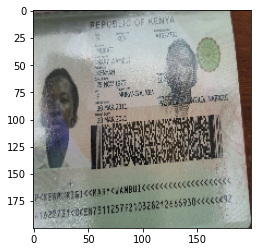

This is a Passport


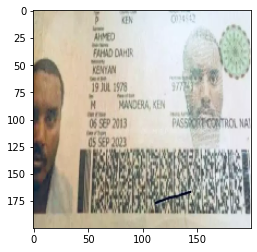

This is a Passport


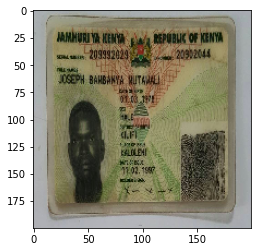

This is an ID


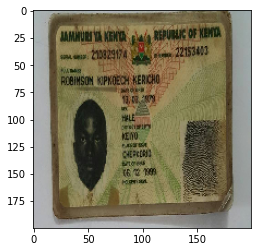

This is a Passport


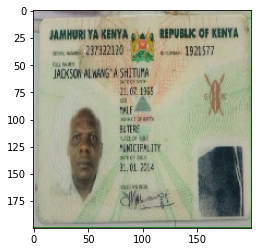

This is an ID


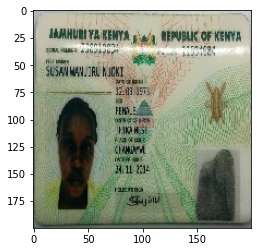

This is an ID


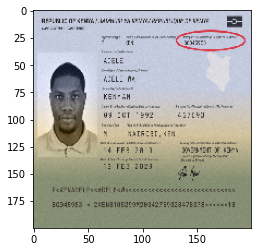

This is a Passport


In [52]:
# test out the images
dir_path = 'C:/Users/lggat/ML - ID & Pass/Gathoni_Assignment_OpenCv_Images/testing/'

# read the images
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    #convert image to array
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0) # provide an additional dimension since we are not using image data gen
    images = np.vstack([X]) #vertically join all the images
    
    val = model.predict(images)
    if val == 0:
        print("This is an ID")
    else:
        print("This is a Passport")

In [54]:
model.save("Id_pass_classifier.model")